<a href="https://colab.research.google.com/github/belokonr/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/lab7/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

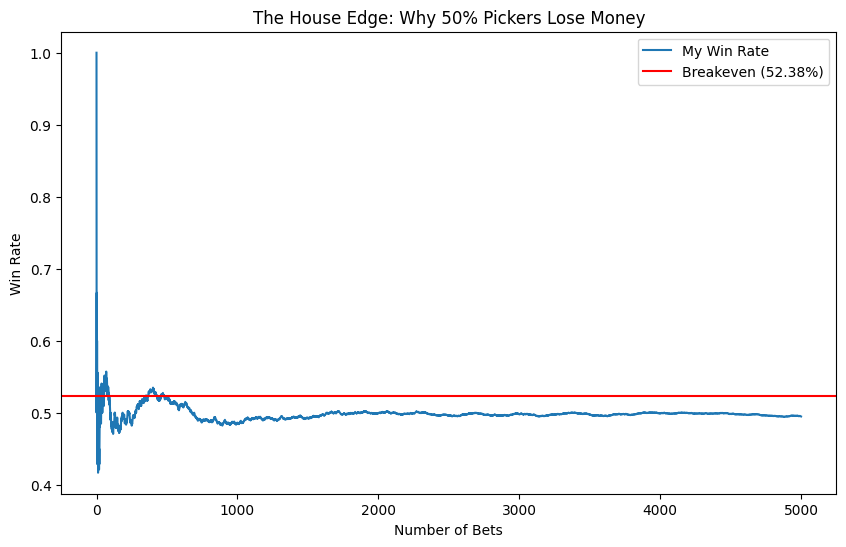

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup
true_skill = 0.50       # You win 50% of the time
breakeven = 0.5238      # -110 odds requires 52.38% to profit
n_bets = 5000           # Simulating a full season

# 2. Simulate
outcomes = np.random.binomial(n=1, p=true_skill, size=n_bets)
cumulative_win_rate = np.cumsum(outcomes) / np.arange(1, n_bets + 1)

# 3. Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error Audit:
Sample 1: Mean = 40.00% | Error = +4.73%
Sample 2: Mean = 38.00% | Error = +2.73%
Sample 3: Mean = 30.00% | Error = -5.27%


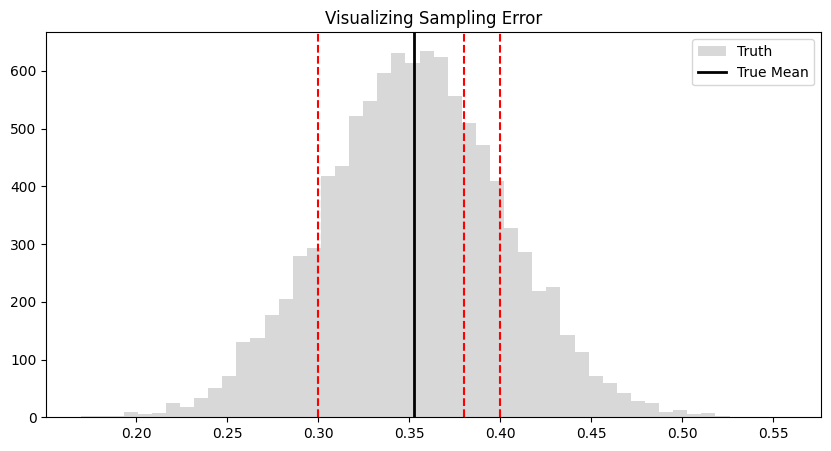

In [3]:
# 1. The "Unknown" Truth
true_mu = 0.3527  # Matching the "True Population Mean"

# 2. Simulate 3 distinct "Samples" (e.g., 3 different users)
samples = []
print(f"Sampling Error Audit:")

for i in range(3):
    # Draw 50 random bets
    sample = np.random.binomial(n=1, p=true_mu, size=50)

    # Calculate stats
    x_bar =  np.mean(sample)
    error =  x_bar - true_mu # The Formula: Error = x_bar - mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

# 3. Quick Visual Check
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

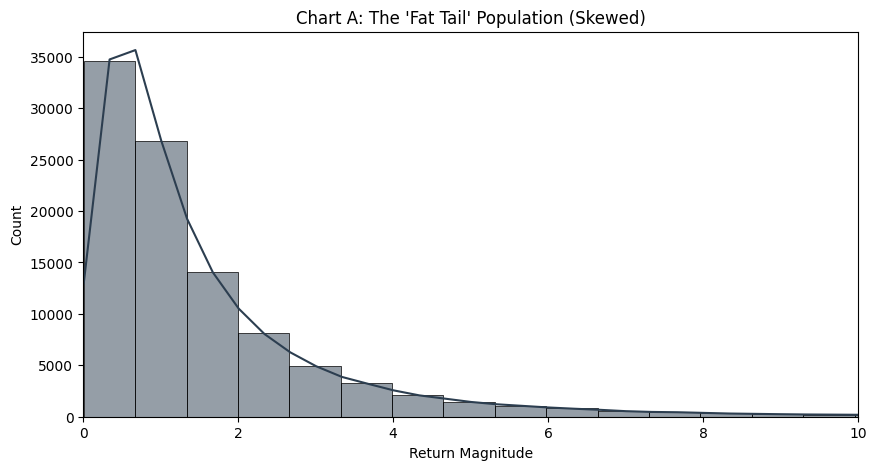

In [4]:
import seaborn as sns

# 1. Define the "Crypto Universe" (Population)
# Log-Normal matches the skewed "Hump + Long Tail" shape of markets
population_data = np.random.lognormal(mean=0, sigma=1.0, size=100000)

# 2. Visualize the Chaos
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=100, kde=True, color='#2c3e50')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

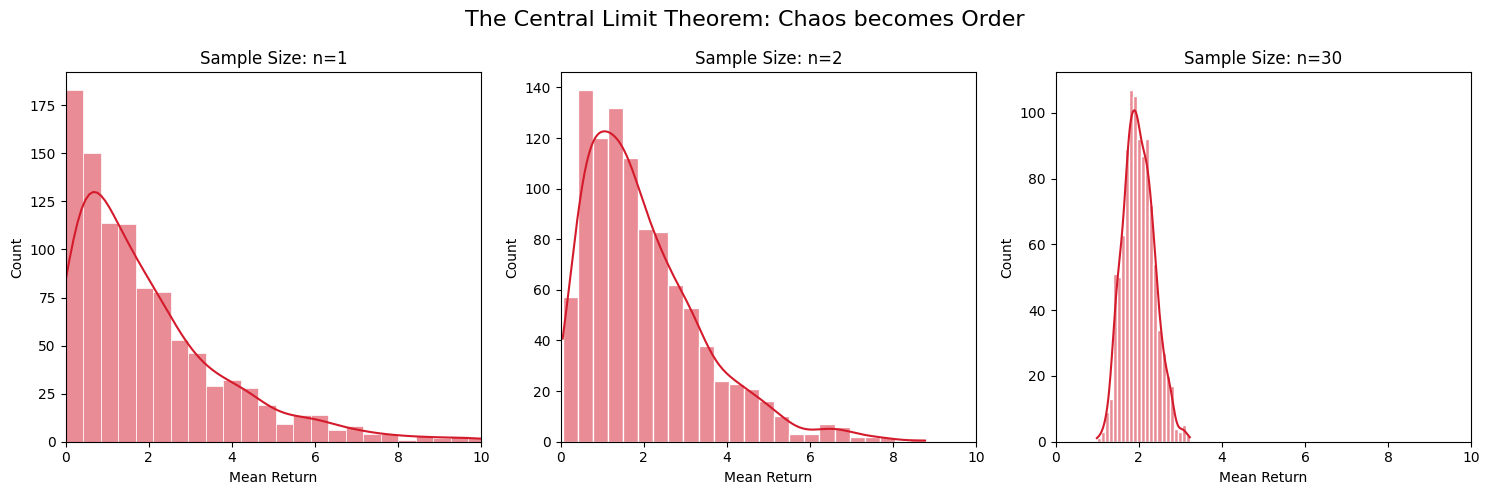

In [5]:
# Setup: Compare 3 sample sizes to match the slide
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    # 1. The Loop: Calculate 1000 averages
    means = []
    for _ in range(simulations):
        sample = np.random.exponential(scale=2, size=n)
        means.append(np.mean(sample))

    # 2. Plotting
    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# 1. Setup: Two Populations, same variance, vastly different sizes
std_dev = 15000  # Variation in spending
n = 100          # We only sample 100 users (The "Teaspoon")

# 2. Calculate Margin of Error (1.96 * sigma / sqrt(n))
# Notice: Big 'N' (Population Size) is NOT in this formula!
margin_error = 1.96 * std_dev / 10

print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ±${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ±${margin_error:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$2,940.00
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


In [7]:
# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = 1.96 * (sigma_A / np.sqrt(n_samples))
moe_B = 1.96 * (sigma_B / np.sqrt(n_samples))

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")


--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.3, 5.7]
   Decision: PASS. (Lower bound implies potential loss)


In [8]:
import numpy as np

# BASE CASE: Independence Assumption (The "Naive" Model)
n_simulations = 1000
months = 24
start_cash = 2_000_000
bankruptcies = 0

print("Running Base Model (Independence)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # SIMULATION LOGIC:
        # Revenue: Average $80k, swings wildly (StdDev $30k)
        # Burn: Average $100k, fairly fixed (StdDev $10k)
        # INDEPENDENT: Bad revenue months don't automatically trigger cost cuts.

        revenue = np.random.normal(80000, 30000)
        burn = np.random.normal(100000, 10000)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Base Model Risk of Ruin: {prob_ruin:.1%}")
print("Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.")

Running Base Model (Independence)...
Base Model Risk of Ruin: 0.0%
Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.


In [9]:
import numpy as np

# REFACTORED: Correlated Revenue & Burn (rho=0.7)
n_simulations = 1000
months = 24
start_cash = 2_000_000
bankruptcies = 0

# Means
mu_revenue = 80000
mu_burn = 100000

# Standard Deviations
sigma_revenue = 30000
sigma_burn = 10000

# Correlation coefficient
rho = 0.7

# Construct covariance matrix
# Cov(X,Y) = rho * sigma_X * sigma_Y
cov_matrix = np.array([
    [sigma_revenue**2, rho * sigma_revenue * sigma_burn],
    [rho * sigma_revenue * sigma_burn, sigma_burn**2]
])

# Mean vector
mean_vector = np.array([mu_revenue, mu_burn])

print("Running Correlated Model (rho=0.7)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # SIMULATION LOGIC:
        # Revenue: Average $80k, StdDev $30k
        # Burn: Average $100k, StdDev $10k
        # CORRELATED (rho=0.7): When revenue drops, burn tends to drop too
        # (e.g., management cuts costs in response to poor sales)

        revenue, burn = np.random.multivariate_normal(mean_vector, cov_matrix)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Correlated Model Risk of Ruin: {prob_ruin:.1%}")
print("Insight: Positive correlation means when revenue crashes, costs also decrease.")
print("This models adaptive management behavior and should REDUCE bankruptcy risk vs. base case.")

# COMPARISON: Run both models side-by-side
print("\n" + "="*70)
print("COMPARISON: Independence vs. Correlation")
print("="*70)

# Base Case (Independence)
bankruptcies_base = 0
for _ in range(n_simulations):
    cash = start_cash
    alive = True
    for month in range(months):
        revenue = np.random.normal(mu_revenue, sigma_revenue)
        burn = np.random.normal(mu_burn, sigma_burn)
        cash += (revenue - burn)
        if cash <= 0:
            alive = False
            break
    if not alive:
        bankruptcies_base += 1

# Correlated Case
bankruptcies_corr = 0
for _ in range(n_simulations):
    cash = start_cash
    alive = True
    for month in range(months):
        revenue, burn = np.random.multivariate_normal(mean_vector, cov_matrix)
        cash += (revenue - burn)
        if cash <= 0:
            alive = False
            break
    if not alive:
        bankruptcies_corr += 1

prob_ruin_base = bankruptcies_base / n_simulations
prob_ruin_corr = bankruptcies_corr / n_simulations

print(f"\nBase Model (Independent):     {prob_ruin_base:.1%} bankruptcy risk")
print(f"Correlated Model (rho=0.7):   {prob_ruin_corr:.1%} bankruptcy risk")
print(f"Risk Reduction:                {(prob_ruin_base - prob_ruin_corr):.1%}")
print("\nConclusion: Positive correlation between revenue and burn reduces risk.")
print("Management that adapts spending to revenue has better survival odds.")

Running Correlated Model (rho=0.7)...
Correlated Model Risk of Ruin: 0.0%
Insight: Positive correlation means when revenue crashes, costs also decrease.
This models adaptive management behavior and should REDUCE bankruptcy risk vs. base case.

COMPARISON: Independence vs. Correlation

Base Model (Independent):     0.0% bankruptcy risk
Correlated Model (rho=0.7):   0.0% bankruptcy risk
Risk Reduction:                0.0%

Conclusion: Positive correlation between revenue and burn reduces risk.
Management that adapts spending to revenue has better survival odds.
